This notebook describes how to create plots for the netCDF file(s) obtained after executing `DIVAnd`.

In [54]:
using NetCDF
using PyPlot

In [3]:
datadir = "./"
datafile = joinpath(datadir, "Water_body_Salinity.4Danl.nc")
if isfile(datafile)
    info("File exist") 
else
    error("File does not exist")
end

INFO: File exist


Open the file for reading

In [9]:
nc = NetCDF.open(datafile);

Inspect the dimensions (dictionaries)

In [12]:
nc.dim

Dict{String,NetCDF.NcDim} with 5 entries:
  "lat"   => NetCDF.NcDim(65536, 1, 1, "lat", 0x0000000000000024, Any[], Dict{A…
  "depth" => NetCDF.NcDim(65536, 2, 2, "depth", 0x0000000000000003, Any[], Dict…
  "time"  => NetCDF.NcDim(65536, 3, 3, "time", 0x0000000000000008, Any[], Dict{…
  "nv"    => NetCDF.NcDim(65536, 4, -1, "nv", 0x0000000000000002, Any[], Dict{A…
  "lon"   => NetCDF.NcDim(65536, 0, 0, "lon", 0x000000000000004c, Any[], Dict{A…

and the variables:

In [13]:
nc.vars

Dict{String,NetCDF.NcVar} with 8 entries:
  "lat"             => [40.0, 40.2, 40.4, 40.6, 40.8, 41.0, 41.2, 41.4, 41.6, 4…
  "depth"           => [0.0, 20.0, 50.0]
  "time"            => [34014.0, 34103.0, 34195.0, 34287.0, 34379.0, 34468.0, 3…
  "Salinity_L2"     => Float32[9.96921f36 9.96921f36 … 9.96921f36 9.96921f36; 9…
  "Salinity"        => Float32[9.96921f36 9.96921f36 … 9.96921f36 9.96921f36; 9…
  "Salinity_relerr" => Float32[9.96921f36 9.96921f36 … 9.96921f36 9.96921f36; 9…
  "lon"             => [27.0, 27.2, 27.4, 27.6, 27.8, 28.0, 28.2, 28.4, 28.6, 2…
  "Salinity_L1"     => Float32[9.96921f36 9.96921f36 … 9.96921f36 9.96921f36; 9…

Note that the dimensions (lon, lat, time and depth) are also variables.

Let's read the dimensions and the salinity field.

In [16]:
lon = ncread(datafile, "lon");
lat = ncread(datafile, "lat");
depth = ncread(datafile, "depth");
time = ncread(datafile, "time");
salinity = ncread(datafile, "Salinity");

Let's also read the time units:

In [23]:
timeunits = nc.vars["time"].atts["units"];

# Create plots
## Simple pseudo color plot
Let's assume we want to plot a given time period at a given depth.

In [31]:
depthplot = 20.;
timeplot = 34195.0;

34195.0

First we extract the indices of the the time and depth arrays.

In [45]:
timeindex = find(time .== timeplot);
depthindex = find(depth .== depthplot);

Then we extract the 2-D salinity field. If we are not sure about the dimension order, we can check the matrix size. Also note the use of [`squeeze`](https://docs.julialang.org/en/stable/stdlib/arrays/#Base.squeeze) to remove the unnecessary dimensions.

In [52]:
@show size(salinity);
salinityplot = salinity[:, :, depthindex, timeindex];
@show size(salinityplot);
salinityplot = squeeze(salinityplot, (3, 4));
@show size(salinityplot);

size(salinity) = (76, 36, 3, 8)
size(salinityplot) = (76, 36, 1, 1)
size(salinityplot) = (76, 36)


Now we can easily create a simple plot.

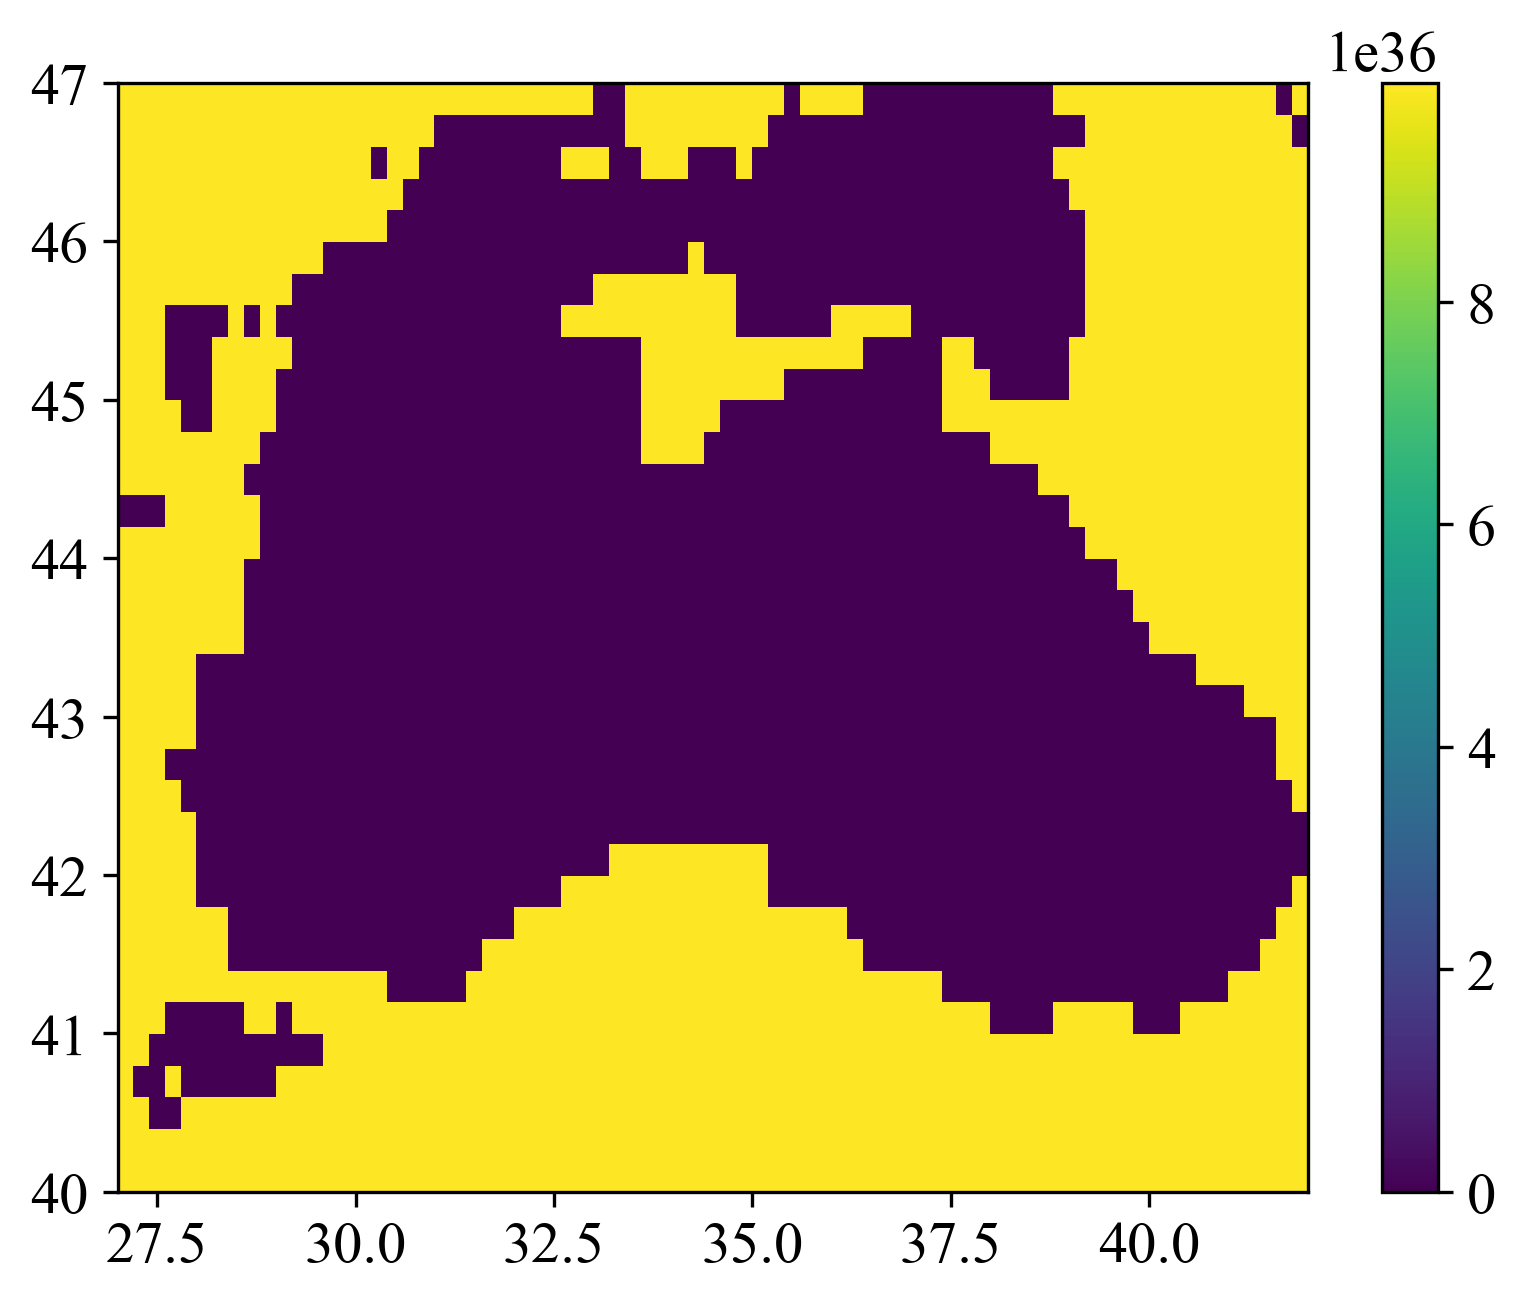

In [59]:
pcolormesh(lon, lat, transpose(salinityplot))
colorbar()
show()

In [ ]:
Obviously the land-sea mask was not taken into account:

In [73]:
maxval = maximum(salinityplot)

9.96921f36

A solution could be to specify the minimal and maximal values using `vmin` and `vmax` parameters:

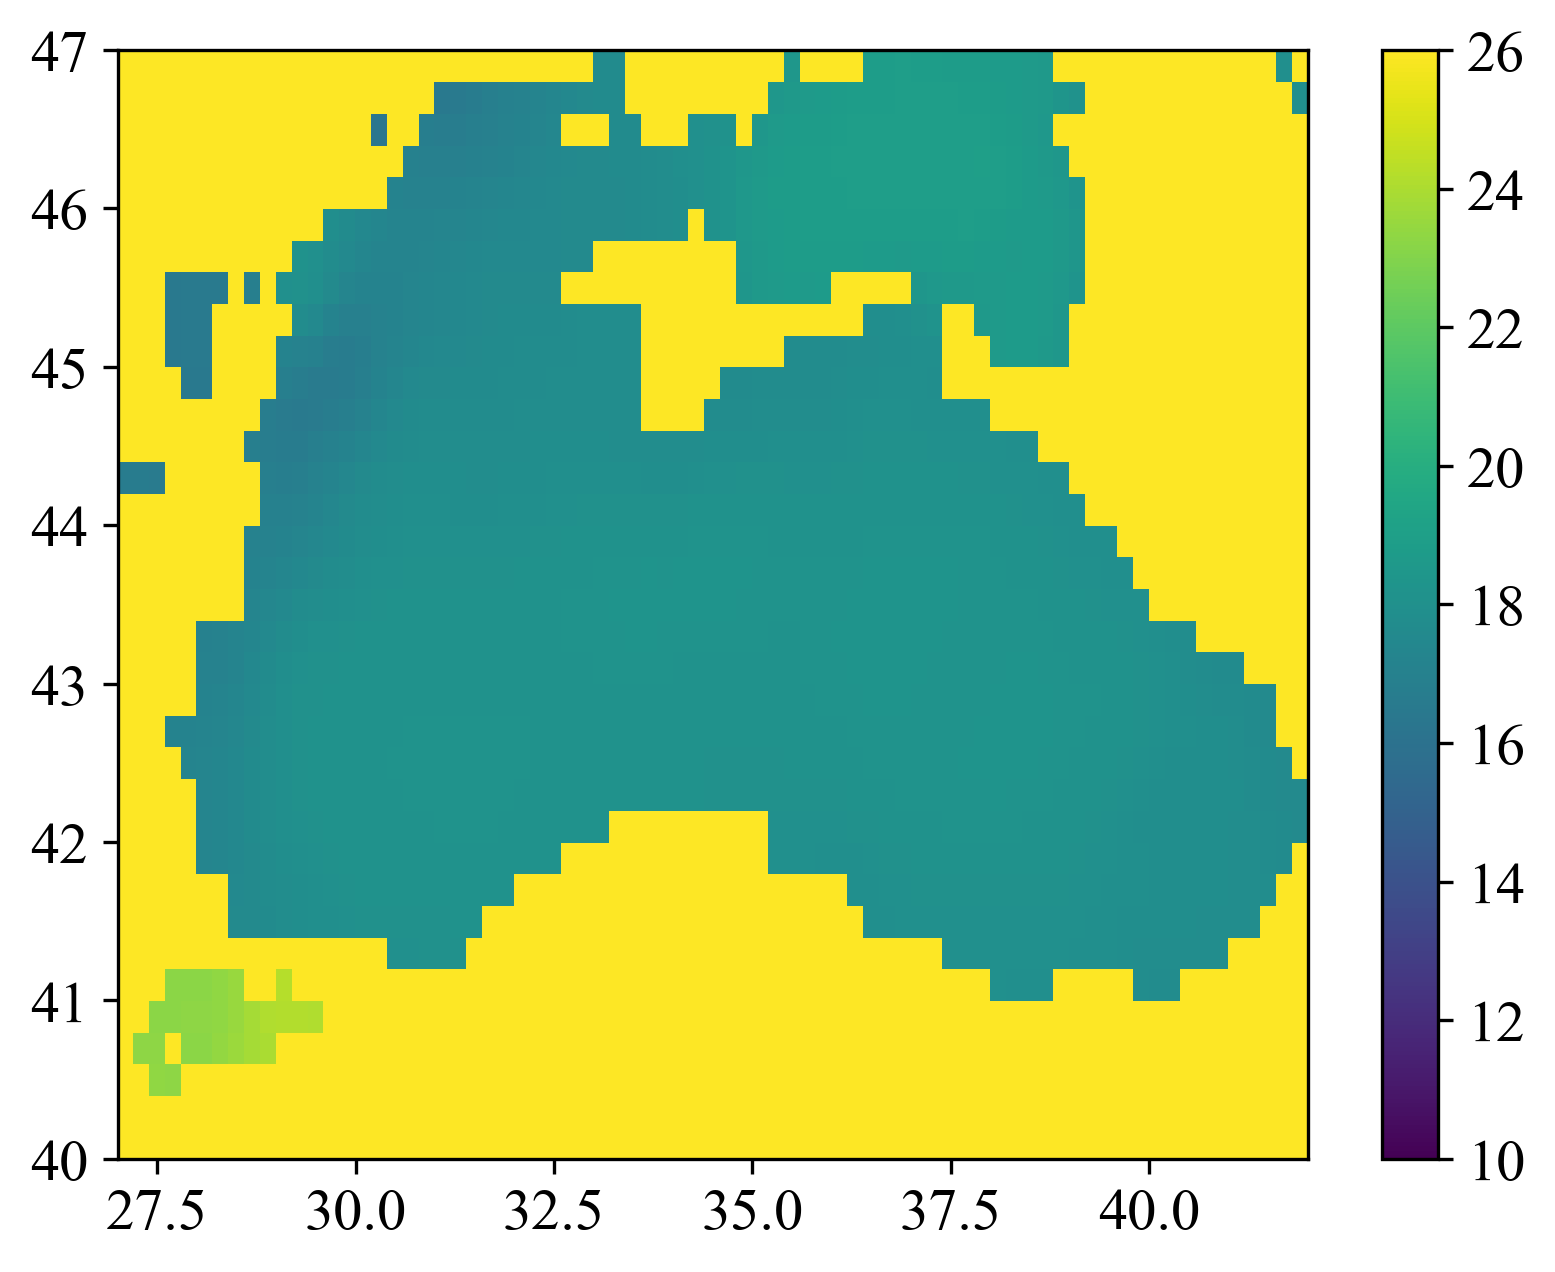

In [72]:
pcolormesh(lon, lat, transpose(salinityplot), vmin=10, vmax=26)
colorbar()
show()

Or we can set the land values to NaN:

In [74]:
salinityplot[salinityplot .== maxval] = NaN;

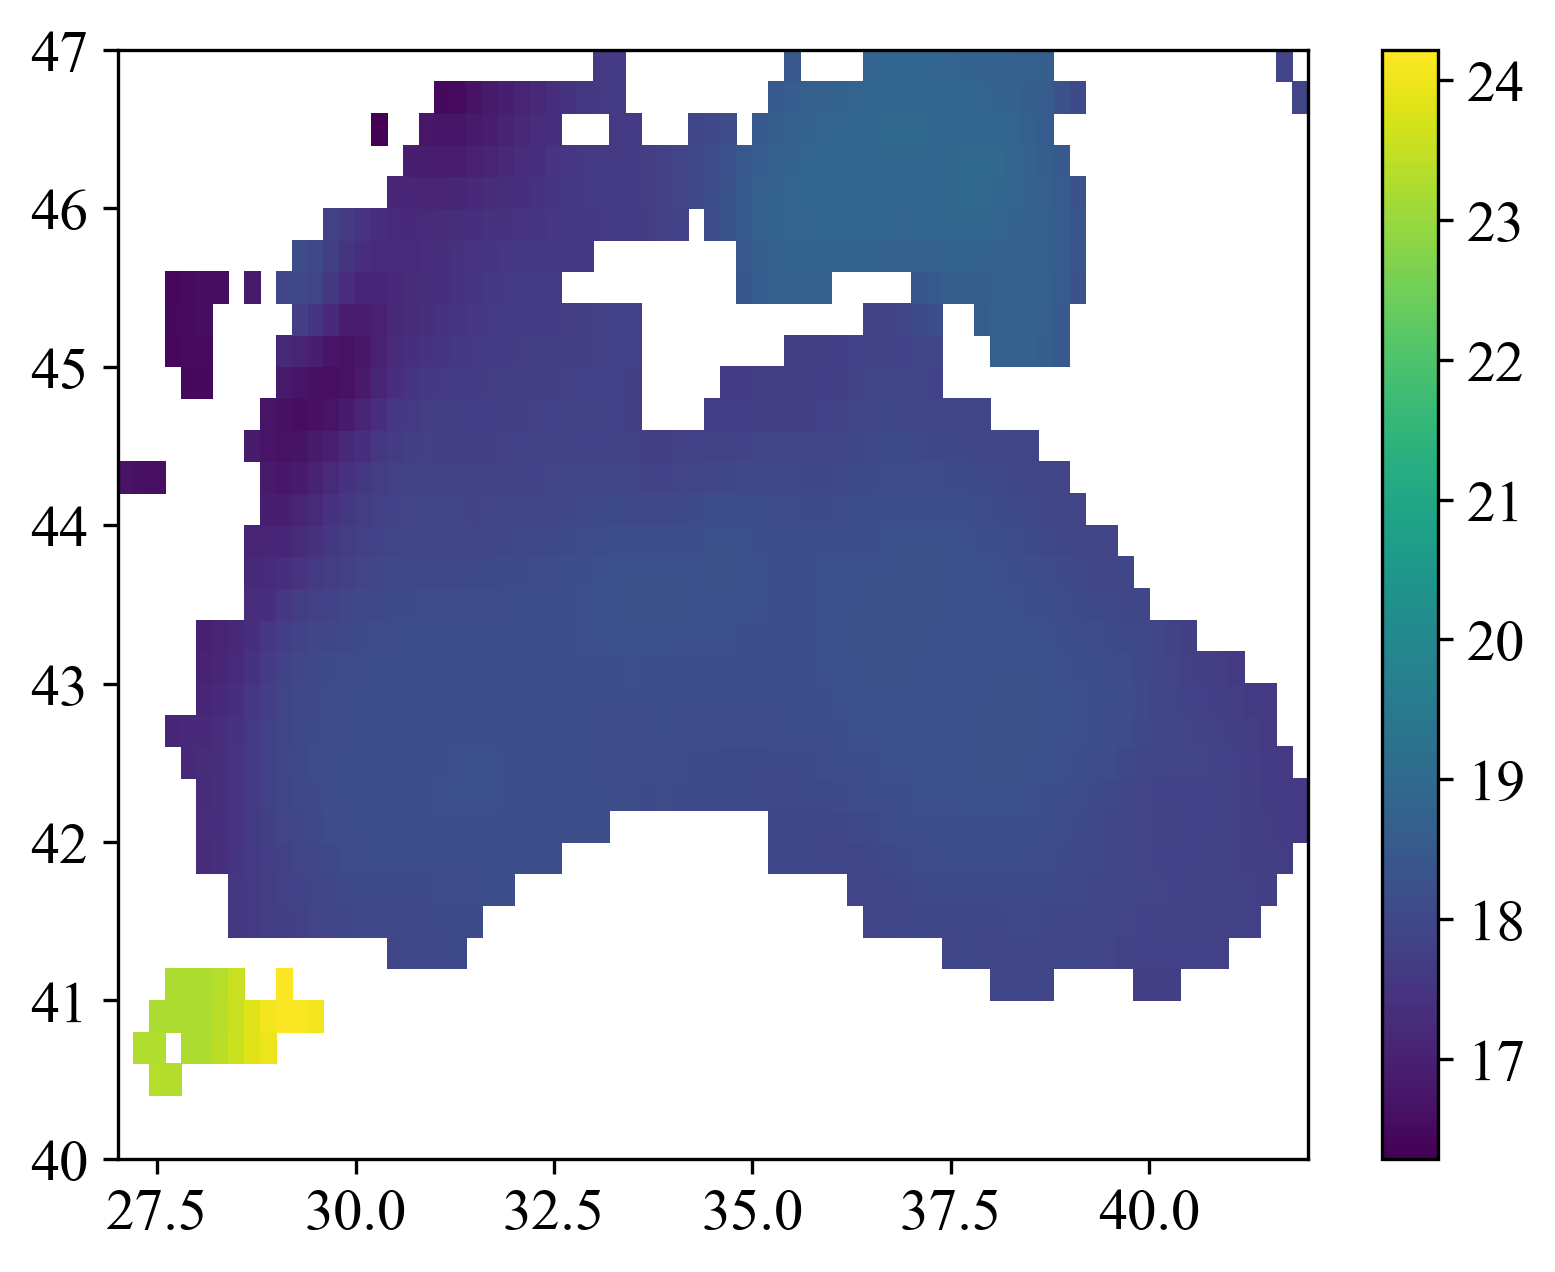

In [76]:
pcolormesh(lon, lat, transpose(salinityplot))
colorbar()
show()

## Contour plots
We explicitely specify the levels to be represented (from 15 to 25).    

In [96]:
conts = contour(lon, lat, transpose(salinityplot), 
    levels=collect(15:.25:25))
clabel(conts, inline=1, fontsize=10)

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <class 'AttributeError'>
AttributeError("'PyCall.jlwrap' object has no attribute 'clabel'",)
  File "/home/ctroupin/miniconda3/envs/divand_wps/lib/python3.6/site-packages/matplotlib/pyplot.py", line 2755, in clabel
    ret = ax.clabel(CS, *args, **kwargs)
  File "/home/ctroupin/miniconda3/envs/divand_wps/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 5882, in clabel
    return CS.clabel(*args, **kwargs)
[39m

## Filled contour plots
The aspect is somehow different from the pcolor.


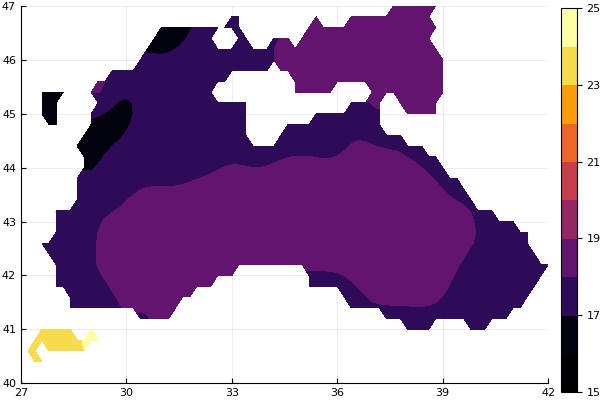

In [88]:
contourf(lon, lat, transpose(salinityplot), levels=collect(15:1:25))